# 2020-6-8-Initial EDA

Analysis by Jeremy P Mann

My primary recommendation from this analysis is we should focus primarily on the 64 by 64 greyscale images.

I saved a figure of the distributions of color intensities amongst various classes

Data can be found at Kaggle:

kaggle.com/kmader/colorectal-histology-mnist/kernels

It looks like the main files comes in a few flavors:
 * $8 \times 8$ 
     * RGB 
     * greyscale 
 * $28 \times 28$ 
     * RGB 
     * greyscale 
 * $64 \times 64$ 
     * greyscale 
     
Dunno why there's no color 64 by 64 image?

Main take aways: 
* A relatively unsystematic analysis suggests that there is not much additional information stored within the color images. I came to think conclusion through a quick PCA analysis (96% of variance is contained within the top eigenspace), and looking at 3d plots of a scattering of examples. This makes sense for H&E, where you're only staining for one thing that the redness is inconsequential to the 
* The highest resolution pictures seem to contain actually interesting information, and 64 by 64 isn't crazy high resolution (imagenet is 256 by 256).
    * In other words, I hypothesize that the higher resolution and reduced complexity is a good trade off for the lack of color information.
* One could go even deeper in a variety of ways, e.g. compute the std of the distribution of highest weight eigenvectors for each pixel, but this seems like low ROI

NOT HARD TO DO: make ipyvolume style scatter with widgets for the distribution in color space of each class in 24 by 24 images

In [472]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import ipyvolume as ipv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set()

In [104]:
direc = '../data/colorectal-histology-mnist/hmnist_'

df_64_L = pd.read_csv(direc + '64_64_L.csv')
df_28_L = pd.read_csv(direc + '28_28_L.csv')
df_8_L = pd.read_csv(direc + '8_8_L.csv')

df_28_RGB = pd.read_csv(direc + '28_28_RGB.csv')
df_8_RGB = pd.read_csv(direc + '8_8_RGB.csv')

Let's see how the first image looks like for each type.

[Text(0.5, 1.0, '28 by 28 greyscale')]

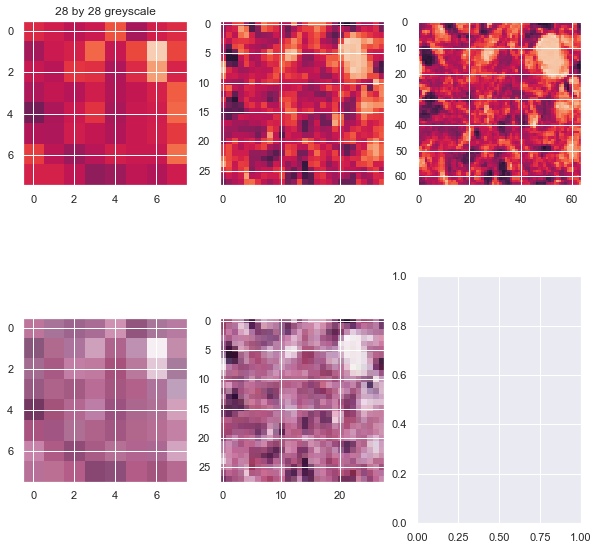

In [522]:
sample_index = 0

fig, ax = plt.subplots(2, 3, figsize = (10, 10))

ax[0, 0].imshow(df_8_L.iloc[sample_index, :-1].values.reshape(8, 8), vmin = 0, vmax = 260)
ax[0, 0].set(title = '8 by 8 greyscale')
ax[0, 1].imshow(df_28_L.iloc[sample_index, :-1].values.reshape(28, 28), vmin = 0, vmax = 260)
ax[0, 0].set(title = '28 by 28 greyscale')
ax[0, 2].imshow(df_64_L.iloc[sample_index, :-1].values.reshape(64, 64), vmin = 0, vmax = 260)
ax[0, 0].set(title = '64 by 6 greyscale')
ax[1, 0].imshow(df_8_RGB.iloc[sample_index, :-1].values.reshape(8, 8, 3), vmin = 0, vmax = 250)
ax[0, 0].set(title = '8 by 8 greyscale')
ax[1, 1].imshow(df_28_RGB.iloc[sample_index, :-1].values.reshape(28, 28, 3), vmin = 0, vmax = 250)
ax[0, 0].set(title = '28 by 28 greyscale')

It looks like there is actually meaningful information contained in the higher resolutions 

It doesn't seem like much information is being gained from the additional color channel. I'll check by collecting all the raw values from the color images and running a PCA. The reshaping method below is awkward, but I was nervous about mixing up the color/pixel position/sample channels.

In [180]:
colors = df_28_RGB.iloc[:, :-1].values.reshape(-1, 28, 28, 3).reshape(-1,28*28, 3).reshape(-1, 3)

pca = PCA(n_components = 3)
pca.fit(colors)
pca.explained_variance_ratio_

array([0.96549447, 0.03045222, 0.00405331])

Overall pretty good, but not great.

Below is a plot of the mean distribution of the colors of each photo

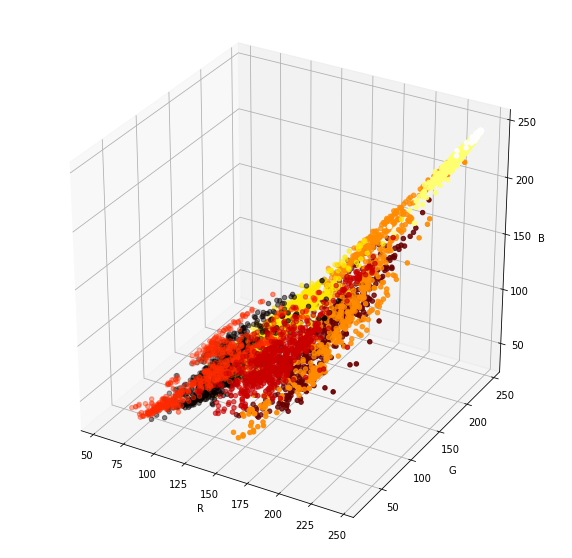

In [458]:
labels = df_28_RGB.iloc[:,-1]
colors = df_28_RGB.iloc[:, :-1].values.reshape(-1, 28, 28, 3)
av_colors = colors.mean(axis = 1).mean(axis = 1)
labels = df_28_RGB.iloc[:,-1]
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
mhot = plt.get_cmap("hot")
ax.scatter(av_colors[:, 0], av_colors[:, 1], av_colors[:, 2], c = labels, cmap = mhot, zdir = 'y')
ax.set(xlabel = 'R', ylabel = "G", zlabel = 'B',);

There's a clear difference in the mean distributions amongst classes, but I doubt this is worth the drop in resolution.

In [455]:
cm = {1: "Tumor", 2: "Stroma", 3: "Complex", 4: "Lympho",
               5: "Debris", 6: "Mucosa", 7: "Adipose", 8: "Empty"}

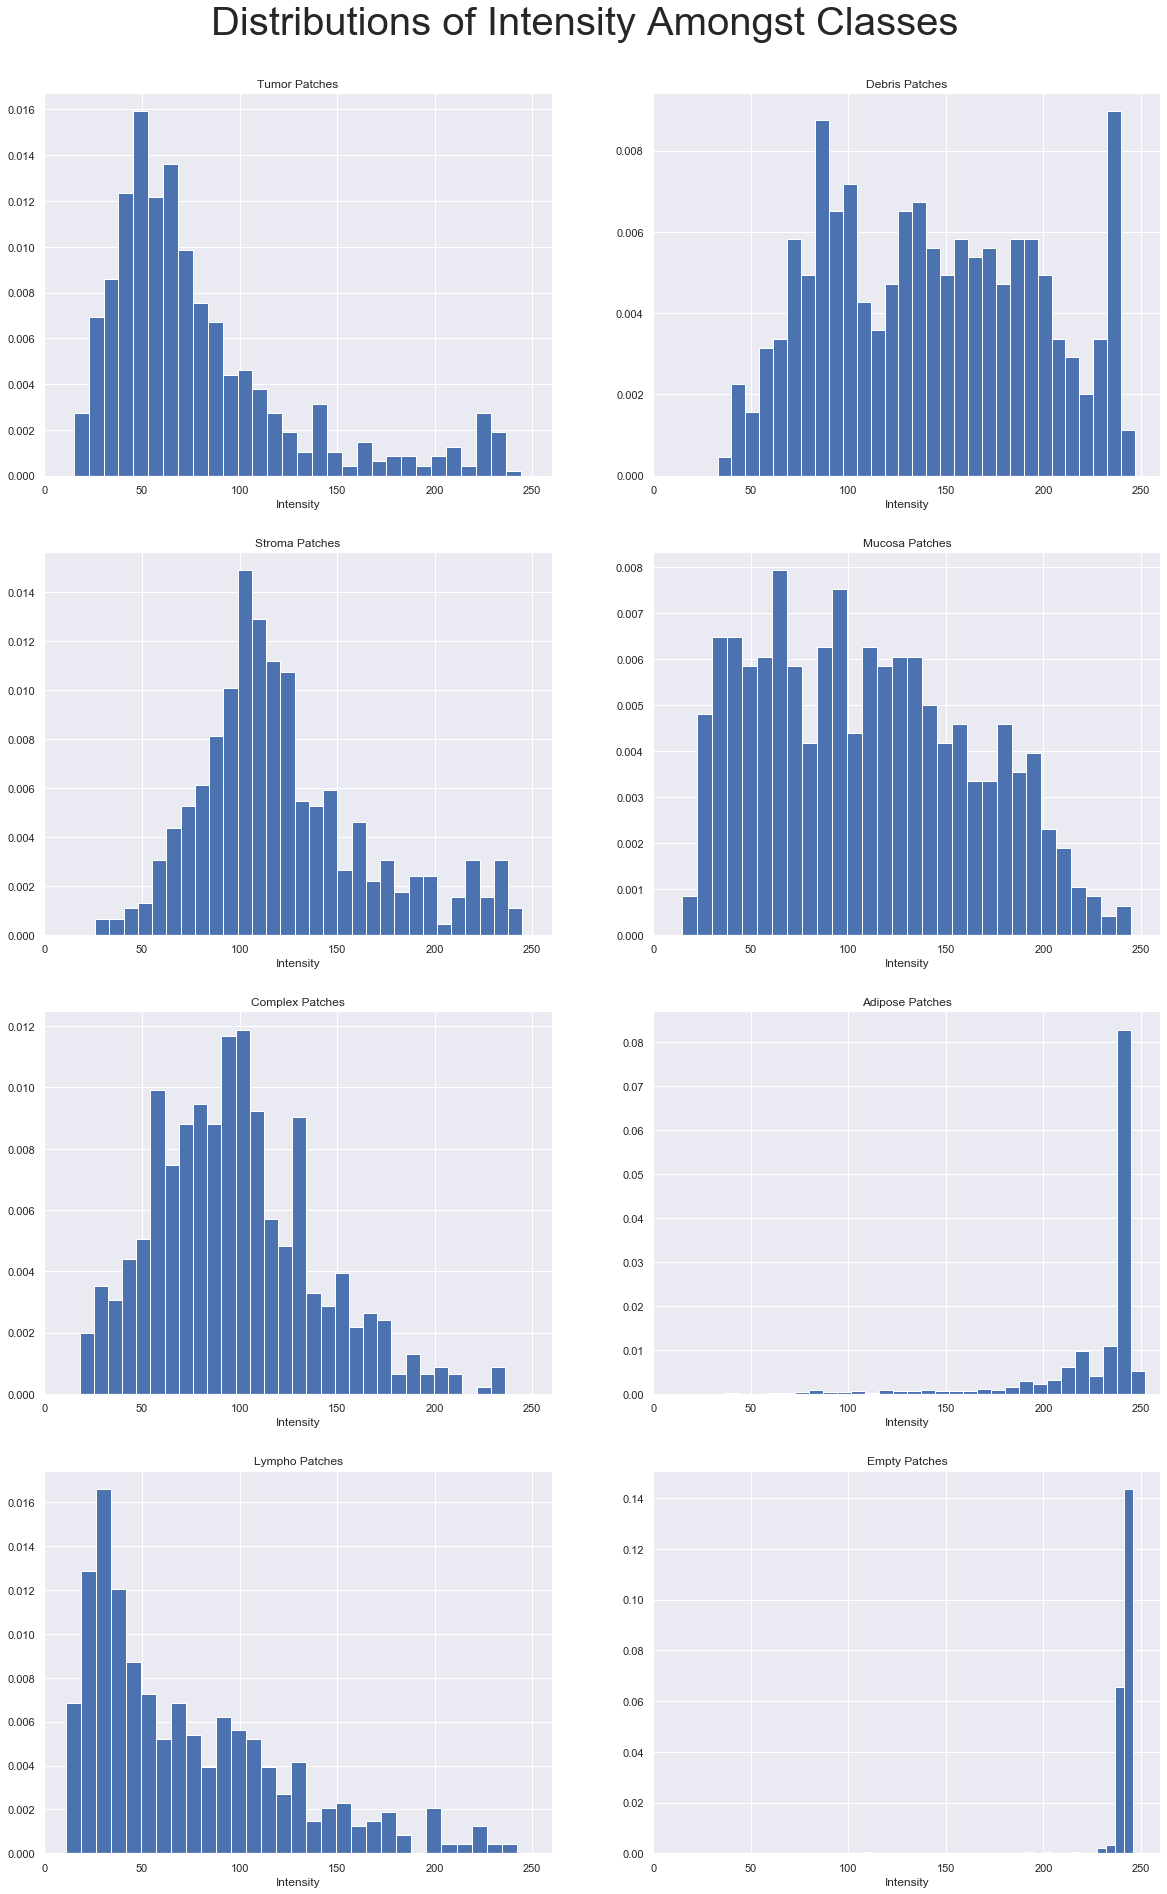

In [521]:
fig, ax = plt.subplots(4, 2, figsize = (20, 30))
fig.suptitle('Distributions of Intensity Amongst Classes', fontsize = 40)

for i in range(0, 4):
    ax[i, 0].hist(pixel[labels == i+ 1], bins = 30, density = True)
    ax[i, 0].set(xlim = (0, 260) , xlabel= 'Intensity', title = cm[i+1] + ' Patches')

for i in range(0, 4):
    ax[i, 1].hist(pixel[labels == i+ 5],bins = 30, density = True)
    ax[i, 1].set(xlim = (0, 260) , xlabel= 'Intensity', title = cm[i+5] + ' Patches')

plt.savefig("../figures/distributions_of_intensities")
fig.subplots_adjust(top=.94)